In [38]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

sns.set(style="darkgrid",font="SimHei",rc={"axes.unicode_minus":False})
warnings.filterwarnings("ignore")


In [39]:
# 加载相关数据集
data=pd.read_csv("data.csv")
print(data.shape)
data.head()

(325, 12)


,City,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48


In [ ]:
数据清洗

In [41]:
# 缺失值处理
data.info()
# data.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
City                       325 non-null object
AQI                        325 non-null int64
Precipitation              321 non-null float64
GDP                        325 non-null float64
Temperature                325 non-null float64
Longitude                  325 non-null float64
Latitude                   325 non-null float64
Altitude                   325 non-null float64
PopulationDensity          325 non-null int64
Coastal                    325 non-null int64
GreenCoverageRate          325 non-null float64
Incineration(10,000ton)    325 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 30.5+ KB


0.27360760671177387


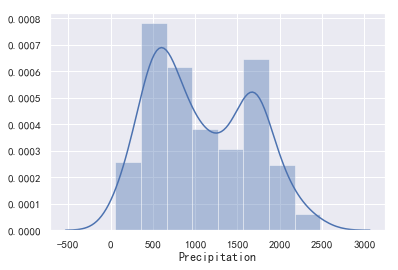

In [42]:
# 偏度
print(data["Precipitation"].skew()) # 偏度大于0 右偏
sns.distplot(data["Precipitation"].dropna())

In [43]:
# 中值
data.fillna({"Precipitation":data["Precipitation"].median()},inplace=True)
# print(data)

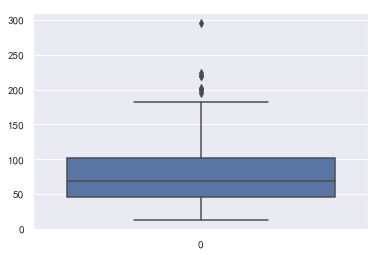

In [44]:
# 异常值处理
# data.describe()
sns.boxplot(data=data["AQI"])

In [47]:
# 重复值处理
# 发现重复值
data.duplicated().sum()
# 查看那些记录出现重复值
# data[data.duplicated(keep=False)]
# 删除重复值
# data.drop_duplicates(inplace=True)

0

In [ ]:
数据分析

,City,AQI
204,Shaoguan City,12
163,Nanping City,12
154,Meizhou City,12
91,Keelung City,13
195,Sanming City,13


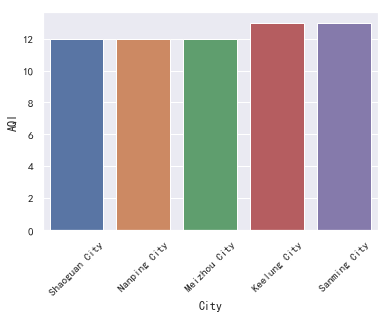

In [48]:
# 空气质量最好的5个城市
t=data[["City","AQI"]].sort_values("AQI")
display(t.iloc[:5])
plt.xticks(rotation=45)
sns.barplot(x="City",y="AQI",data=t.iloc[:5])

,City,AQI
105,Jiaozuo City,199
112,Jinzhou City,202
13,Baoding City,220
26,Chaoyang City,224
16,Beijing City,296


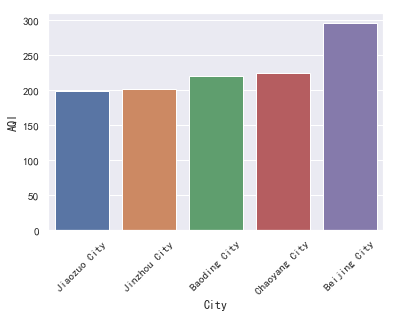

In [49]:
# 空气质量最差的5个城市
display(t.iloc[-5:])
plt.xticks(rotation=45)
sns.barplot(x="City",y="AQI",data=t.iloc[-5:])

二级    136
一级    103
三级     66
四级     14
五级      4
Name: AQI, dtype: int64

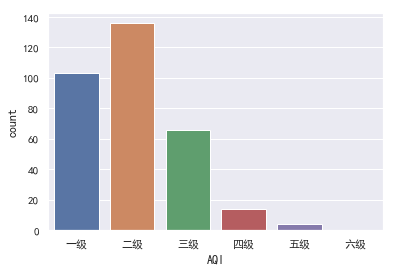

In [50]:
# 空气质量等级统计
#将AQI转换为对应的等级

def value_to_level(AQI):
    if AQI>=0 and AQI<=50:
        return "一级"
    elif AQI>=51 and AQI<=100:
        return "二级"
    elif AQI>=101 and AQI<=150:
        return "三级"
    elif AQI>=151 and AQI<=200:
        return "四级"
    elif AQI>=201 and AQI<=300:
        return "五级"
    else:
        return "六级"

level=data["AQI"].apply(value_to_level)
display(level.value_counts())
# order指定顺序
sns.countplot(x=level,order=["一级","二级","三级","四级","五级","六级"])

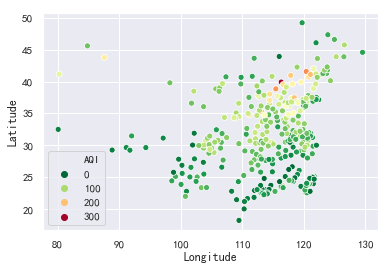

In [12]:
# 空气质量指数分布
sns.scatterplot(x="Longitude",y="Latitude",hue="AQI",palette=plt.cm.RdYlGn_r,data=data)

In [ ]:
临海城市是否空气质量优于内陆城市

0    245
1     80
Name: Coastal, dtype: int64

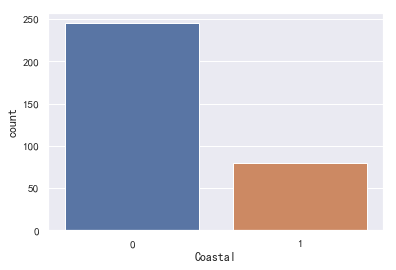

In [13]:
display(data["Coastal"].value_counts())
sns.countplot(x="Coastal",data=data)

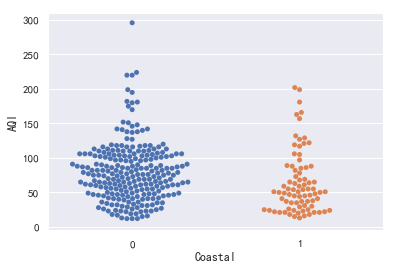

In [14]:
sns.swarmplot(x="Coastal",y="AQI",data=data)

Coastal
0    79.644898
1    64.062500
Name: AQI, dtype: float64

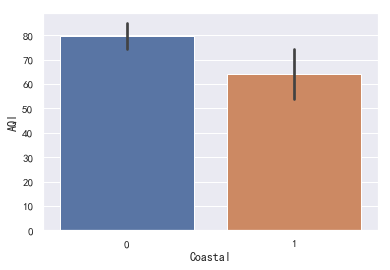

In [16]:
# 计算空气质量的均值
display(data.groupby("Coastal")["AQI"].mean())
sns.barplot(x="Coastal",y="AQI",data=data)

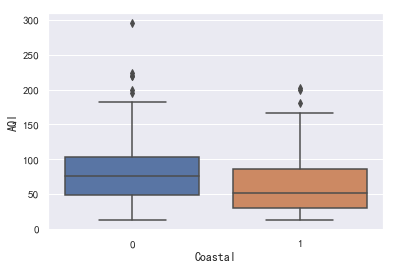

In [17]:
# 箱线图
sns.boxplot(x="Coastal",y="AQI",data=data)

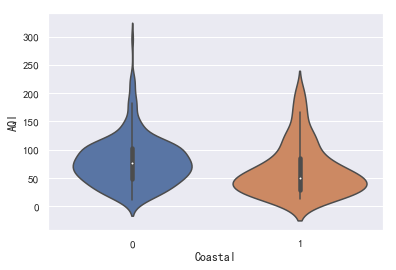

In [18]:
# 小提琴图
sns.violinplot(x="Coastal",y="AQI",data=data)

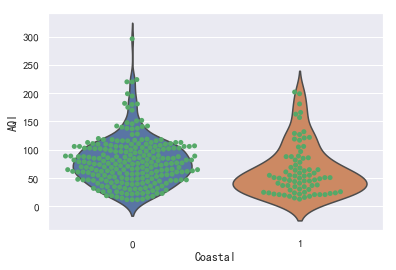

In [20]:
# 散点和小提琴图合起来 
# inner=None里面的箱线图不显示，以免造成干扰
sns.violinplot(x="Coastal",y="AQI",data=data,inner=None)
sns.swarmplot(x="Coastal",y="AQI",color="g",data=data)

In [ ]:
以上的数据还不能确定沿海城市的空气质量大于内陆，因此进一步进行假设检验

In [22]:
from scipy import stats

coastal=data[data["Coastal"]==1]["AQI"]
inland=data[data["Coastal"]==0]["AQI"]

# 进行方差齐性检验，为后面两样本t检验服务
stats.levene(coastal,inland)

LeveneResult(statistic=0.03818483157315866, pvalue=0.8451953286335765)

In [23]:
# 进行样本t检验，注意：两样本相同与不相同，取得的结果也不相同
stats.ttest_ind(coastal,inland,equal_var=True)

Ttest_indResult(statistic=-2.804017387113549, pvalue=0.005352397281668703)

In [ ]:
空气质量受哪些因素的影响
人口密度大，是否会对空气质量造成负面影响？
绿化率高，是否会提高空气质量？

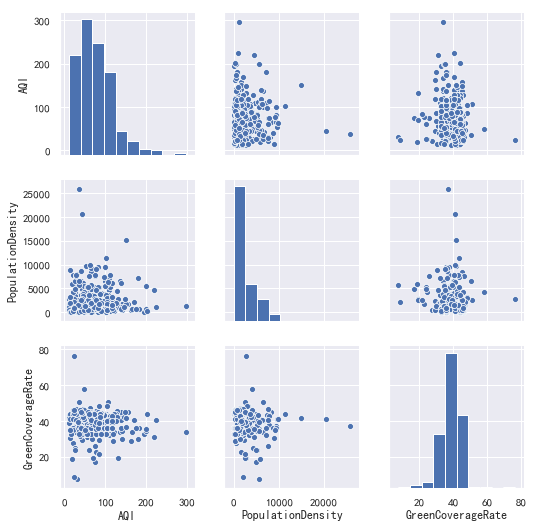

In [24]:
# 绘制配对关系图
sns.pairplot(data[["AQI","PopulationDensity","GreenCoverageRate"]])

In [25]:
# 计算AQI和降雨量的相关关系
x=data["AQI"]
y=data["Precipitation"]
# 计算AQI和降雨量协方差
a=(x-x.mean())*(y-y.mean())
cov=np.sum(a)/(len(a)-1)
print(cov)
# 计算AQI和降雨量相关系数
corr=cov/np.sqrt(x.var()*y.var())
print(corr)

-10278.683921772239
-0.40159811621922753


In [26]:
print(x.cov(y))
print(x.corr(y))

-10407.167470794397
-0.4043784360785914


In [27]:
data.corr()

,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
AQI,1.000000,-0.404378,0.158404,-0.284551,0.094299,0.553932,-0.206416,-0.018488,-0.154155,-0.108193,0.104481
Precipitation,-0.404378,1.000000,0.175849,0.686503,0.225373,-0.658193,-0.323631,0.065860,0.263241,0.158939,0.200696
GDP,0.158404,0.175849,1.000000,0.145554,0.173037,-0.010074,-0.208350,0.227883,0.174573,-0.038672,0.899550
Temperature,-0.284551,0.686503,0.145554,1.000000,0.140873,-0.806979,-0.458015,0.143276,0.306503,0.217958,0.173594
Longitude,0.094299,0.225373,0.173037,0.140873,1.000000,0.173903,-0.737326,-0.121305,0.374128,0.155278,0.072024
Latitude,0.553932,-0.658193,-0.010074,-0.806979,0.173903,1.000000,0.000449,-0.163498,-0.206078,-0.146780,-0.081629
Altitude,-0.206416,-0.323631,-0.208350,-0.458015,-0.737326,0.000449,1.000000,-0.033568,-0.269489,-0.179219,-0.121599
PopulationDensity,-0.018488,0.065860,0.227883,0.143276,-0.121305,-0.163498,-0.033568,1.000000,-0.036871,0.016873,0.281934
Coastal,-0.154155,0.263241,0.174573,0.306503,0.374128,-0.206078,-0.269489,-0.036871,1.000000,0.266610,0.159307
GreenCoverageRate,-0.108193,0.158939,-0.038672,0.217958,0.155278,-0.146780,-0.179219,0.016873,0.266610,1.000000,-0.028239


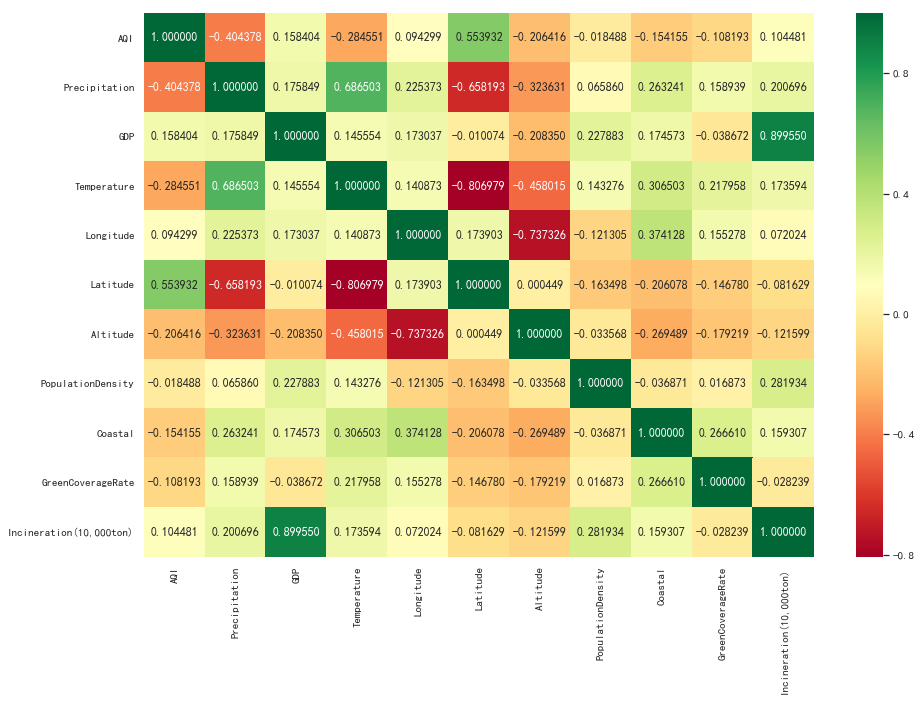

In [28]:
# 热力图
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap=plt.cm.RdYlGn,annot=True,fmt="2f")

In [29]:
# 江湖传闻，全国所有城市的空气质量指数的均值在71左右，这个消息可靠吗？
data["AQI"].mean() # 样本，不能代表总体

75.80923076923077

In [30]:
# 推论统计
from scipy import stats
r=stats.ttest_1samp(data["AQI"],71)
print("t值：",r.statistic)
print("p值：",r.pvalue)

t值： 1.9880443829460461
p值： 0.047648033561617315


In [31]:
# 置信区间
mean=data["AQI"].mean()
std=data["AQI"].std()
mean-1.96*(std/np.sqrt(len(data))),mean+1.96*(std/np.sqrt(len(data)))

(71.06784149817035, 80.55062004029118)

In [ ]:
数据建模

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = data.drop(["City","AQI"], axis=1)
y = data["AQI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))


0.4685357478390666
0.30759980354177274


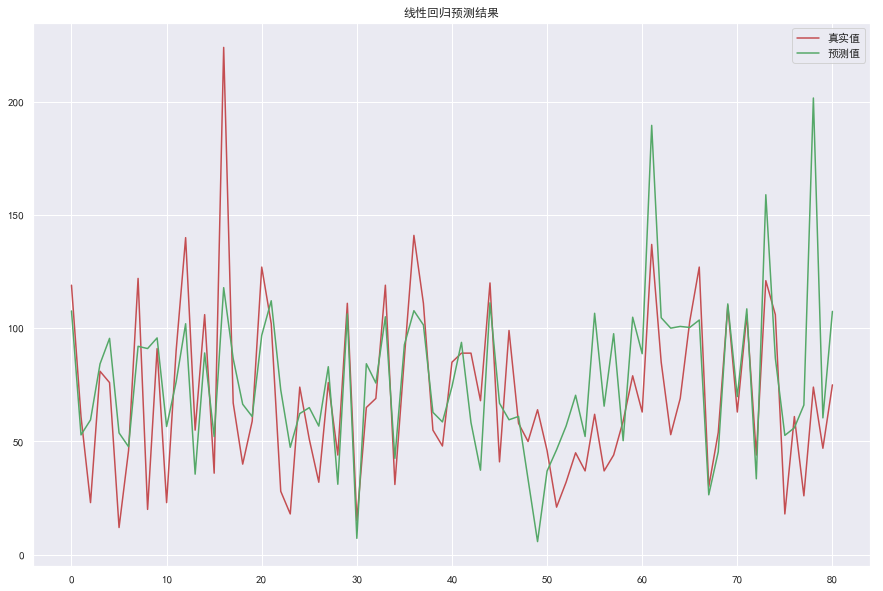

In [52]:
plt.figure(figsize=(15,10))
plt.plot(y_test.values,"-r",label="真实值")
plt.plot(y_hat,"-g",label="预测值")
plt.title("线性回归预测结果")
plt.legend()

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=500,random_state=0)
rf.fit(X_train,y_train)
y_hat=rf.predict(X_test)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9375592254941046
0.6106531491491578


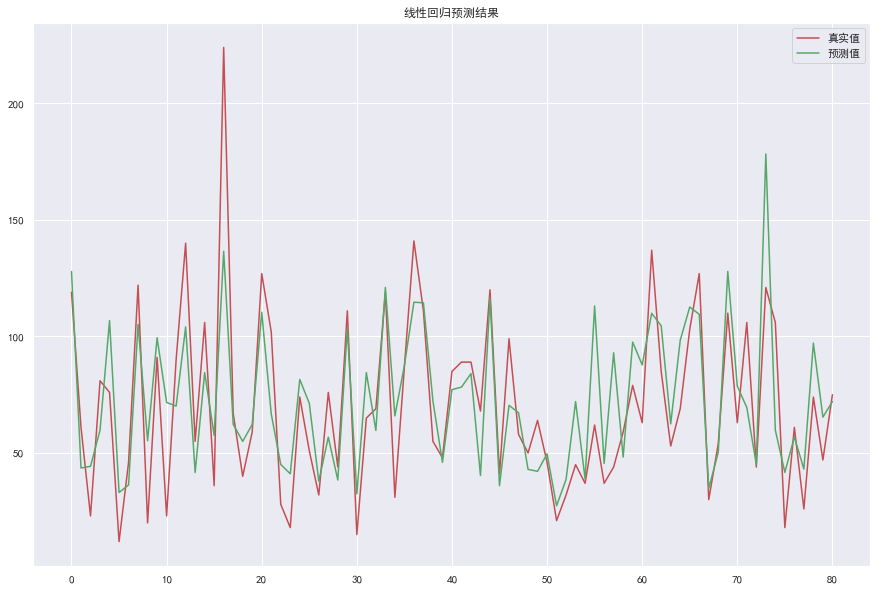

In [54]:
plt.figure(figsize=(15,10))
plt.plot(y_test.values,"-r",label="真实值")
plt.plot(y_hat,"-g",label="预测值")
plt.title("线性回归预测结果")
plt.legend()

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X = data.drop(["City","Coastal"], axis=1)
y = data["Coastal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print(classification_report(y_test, y_hat))


0.8801652892561983
0.7777777777777778
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        59
           1       0.61      0.50      0.55        22

   micro avg       0.78      0.78      0.78        81
   macro avg       0.72      0.69      0.70        81
weighted avg       0.77      0.78      0.77        81



In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=0)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
print(classification_report(y_test, y_hat))


1.0
0.8888888888888888
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.78      0.82      0.80        22

   micro avg       0.89      0.89      0.89        81
   macro avg       0.86      0.87      0.86        81
weighted avg       0.89      0.89      0.89        81



0.9637904468412942


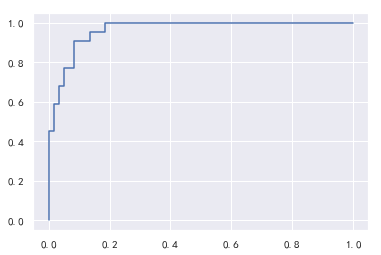

In [64]:
# ROC曲线

from sklearn.metrics import roc_curve,roc_auc_score

score=rf.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,score,pos_label=1)
print(roc_auc_score(y_test,score))
plt.plot(fpr,tpr)

In [ ]:
总结：

1.空气质量总体分布来说，南部城市优于北部城市，西部城市优于东部城市
2.临海城市的空气质量整体上好于内陆城市
3.是否临海，降雨量与维度对空气质量指数的影响较大
4.我国城市平均空气质量指数大致在（71.07, 80.55）这个区间内，在这个区间的可能性概率为95%
5.通过历史数据，我们可以对空气质量指数进行预测
6.通过历史数据，我们可以对城市是否临海进行预测